In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#  path of CSV file
csv_file_path = r'C:\Users\Admin\capstone project\rent_properties_data.csv'

rental_data = pd.read_csv(csv_file_path)

rental_data.head(10)


,Rental Price,Address,No of Bed,No of Bathrooms,Area,Pets Allowed,No of Beds,Rental Price (INR),cities
0,"$5,500","7601 East Treasure Drive, North Bay Village, M...",2.0,1.0,628.0,Yes,2.0,41976.0,Other
1,"$1,850",456 Elm St,3.0,2.0,778.0,No,2.0,70735.0,Other
2,"$1,650",789 Oak St,1.0,1.0,1944.0,Yes,2.0,54111.0,Other
3,€719,"Maria Snelplantsoen 1, 1106 WN Amsterdam, Neth...",2.0,1.0,2152.8,NaN,5.0,65235.0,Amsterdam
4,"€2,290","1015 ND Amsterdam, Netherlands",2.0,4.0,2281.9,NaN,4.0,26493.0,Amsterdam
5,"€4,124","H.J.E. Wenckebachweg 48, 1096 AN Amsterdam, Ne...",2.0,2.0,1184.0,NaN,1.0,11613.0,Amsterdam
6,"€9,001","1059 North Holland, Netherlands",2.0,1.0,215.3,NaN,2.0,907.0,Other
7,"€2,366","Maarten Lutherweg 284, 1185 AX Amstelveen, Net...",2.0,2.0,1291.0,NaN,1.0,33389.0,Other
8,"€7,469","Jan van Zutphenstraat 251, 1069 RR Amsterdam, ...",2.0,2.0,1259.4,NaN,2.0,43187.0,Amsterdam
9,"€4,431","1012 North Holland, Netherlands",2.0,1.0,1216.3,NaN,2.0,39468.0,Other


In [3]:
rental_data.columns

Index(['Rental Price', 'Address', 'No of Bed', 'No of Bathrooms', 'Area',
       'Pets Allowed', 'No of Beds', 'Rental Price (INR)', 'cities'],
      dtype='object')

In [4]:
rental_data.shape

(5041, 9)

In [5]:
rental_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5041 entries, 0 to 5040
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rental Price        5041 non-null   object 
 1   Address             2720 non-null   object 
 2   No of Bed           5041 non-null   float64
 3   No of Bathrooms     5041 non-null   float64
 4   Area                2823 non-null   float64
 5   Pets Allowed        193 non-null    object 
 6   No of Beds          5041 non-null   float64
 7   Rental Price (INR)  5040 non-null   float64
 8   cities              5041 non-null   object 
dtypes: float64(5), object(4)
memory usage: 354.6+ KB


In [6]:
# change in datatype
rental_data['Pets Allowed'] = rental_data['Pets Allowed'].astype(bool)
rental_data['Rental Price (INR)'] = rental_data['Rental Price (INR)'].astype(float)
rental_data['No of Bed'] = rental_data['No of Bed'].astype(int)
rental_data['No of Beds'] = rental_data['No of Beds'].astype(int)

# Verify the changes
print(rental_data.dtypes)


Rental Price           object
Address                object
No of Bed               int32
No of Bathrooms       float64
Area                  float64
Pets Allowed             bool
No of Beds              int32
Rental Price (INR)    float64
cities                 object
dtype: object


In [7]:
# check null values
rental_data.isnull().sum()

Rental Price             0
Address               2321
No of Bed                0
No of Bathrooms          0
Area                  2218
Pets Allowed             0
No of Beds               0
Rental Price (INR)       1
cities                   0
dtype: int64

In [8]:
# fill null value with Mode method

rental_data['Address'].fillna(rental_data['Address'].mode()[0], inplace=True)


rental_data['Area'].fillna(rental_data['Area'].mode()[0], inplace=True)

# Impute missing values in the "Rental Price (INR)" column with the median

rental_data['Rental Price (INR)'].fillna(rental_data['Rental Price (INR)'].median(), inplace=True)

# Check if there are any remaining missing values

print(rental_data.isnull().sum())


Rental Price          0
Address               0
No of Bed             0
No of Bathrooms       0
Area                  0
Pets Allowed          0
No of Beds            0
Rental Price (INR)    0
cities                0
dtype: int64


In [11]:
# Dropping the specified columns

rental_data.drop(['Rental Price', 'Pets Allowed'], axis=1, inplace=True)

# Displaying the updated dataframe

print(rental_data)


                                                Address  No of Bed  \
0     7601 East Treasure Drive, North Bay Village, M...          2   
1                                            456 Elm St          3   
2                                            789 Oak St          1   
3     Maria Snelplantsoen 1, 1106 WN Amsterdam, Neth...          2   
4                        1015 ND Amsterdam, Netherlands          2   
...                                                 ...        ...   
5036                                        Buffalo, NY          2   
5037                                        Buffalo, NY          2   
5038                                        Buffalo, NY          2   
5039                                        Buffalo, NY          2   
5040                                        Buffalo, NY          2   

      No of Bathrooms    Area  No of Beds  Rental Price (INR)     cities  
0                 1.0   628.0           2             41976.0      Other  
1        

In [9]:
rental_data.describe()

,No of Bed,No of Bathrooms,Area,No of Beds,Rental Price (INR)
count,5041.00000,5041.000000,5041.000000,5041.000000,5041.000000
mean,2.00000,1.650169,1240.920611,2.508828,43721.468359
std,0.01992,1.095067,1494.029963,1.465872,28510.030180
min,1.00000,1.000000,1.000000,1.000000,1.000000
25%,2.00000,1.000000,861.100000,2.000000,19242.000000
50%,2.00000,1.000000,1200.000000,2.000000,42059.000000
75%,2.00000,2.000000,1200.000000,3.000000,68138.000000
max,3.00000,10.000000,38606.000000,12.000000,153855.000000


In [ ]:
# Graphical Data Exploration

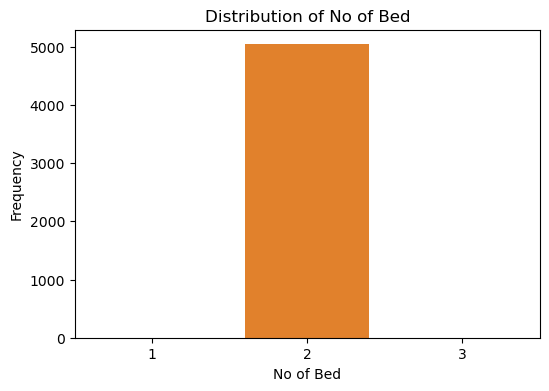

In [10]:
# count Plot

plt.figure(figsize=(6, 4))
sns.countplot(data=rental_data, x='No of Bed')
plt.title('Distribution of No of Bed')
plt.xlabel('No of Bed')
plt.ylabel('Frequency')
plt.show()


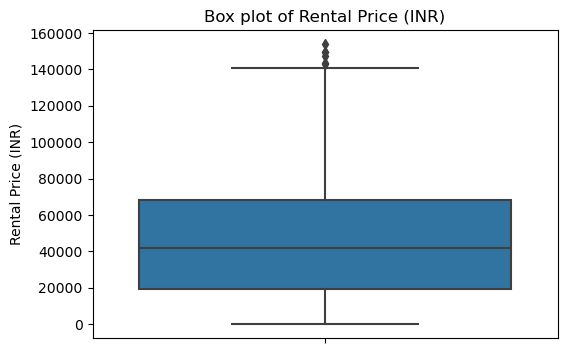

In [11]:
# Box plot for 'Rental Price (INR)'
plt.figure(figsize=(6, 4))
sns.boxplot(data=rental_data, y='Rental Price (INR)')
plt.title('Box plot of Rental Price (INR)')
plt.ylabel('Rental Price (INR)')
plt.show()

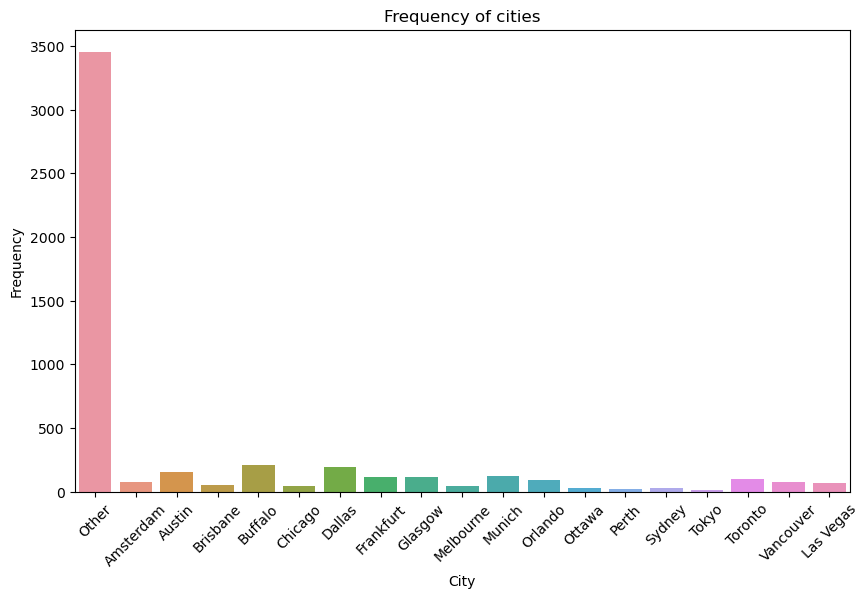

In [12]:
# Bar chart for 'cities'
plt.figure(figsize=(10, 6))
sns.countplot(data=rental_data, x='cities')
plt.title('Frequency of cities')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

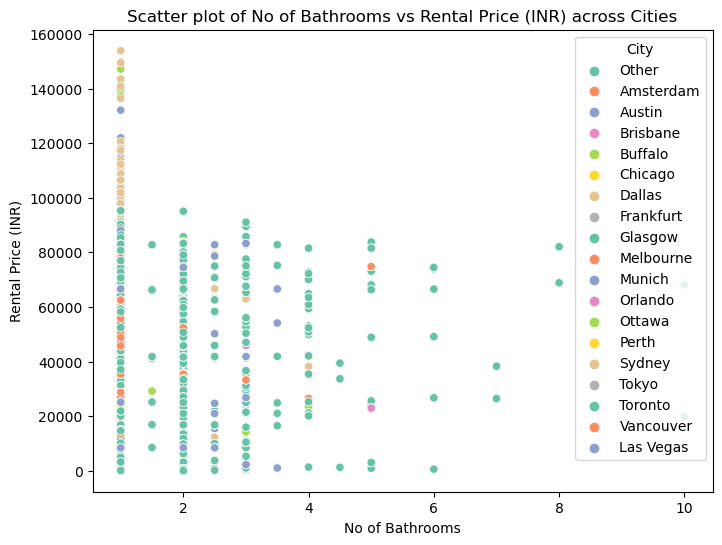

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rental_data, x='No of Bathrooms', y='Rental Price (INR)', hue='cities', palette='Set2', legend='full')
plt.title('Scatter plot of No of Bathrooms vs Rental Price (INR) across Cities')
plt.xlabel('No of Bathrooms')
plt.ylabel('Rental Price (INR)')
plt.legend(title='City')
plt.show()

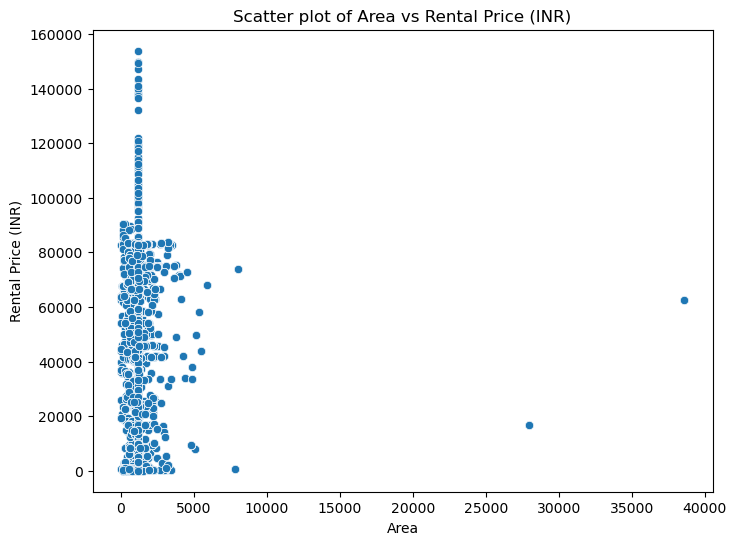

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rental_data, x='Area', y='Rental Price (INR)')
plt.title('Scatter plot of Area vs Rental Price (INR)')
plt.xlabel('Area')
plt.ylabel('Rental Price (INR)')
plt.show()

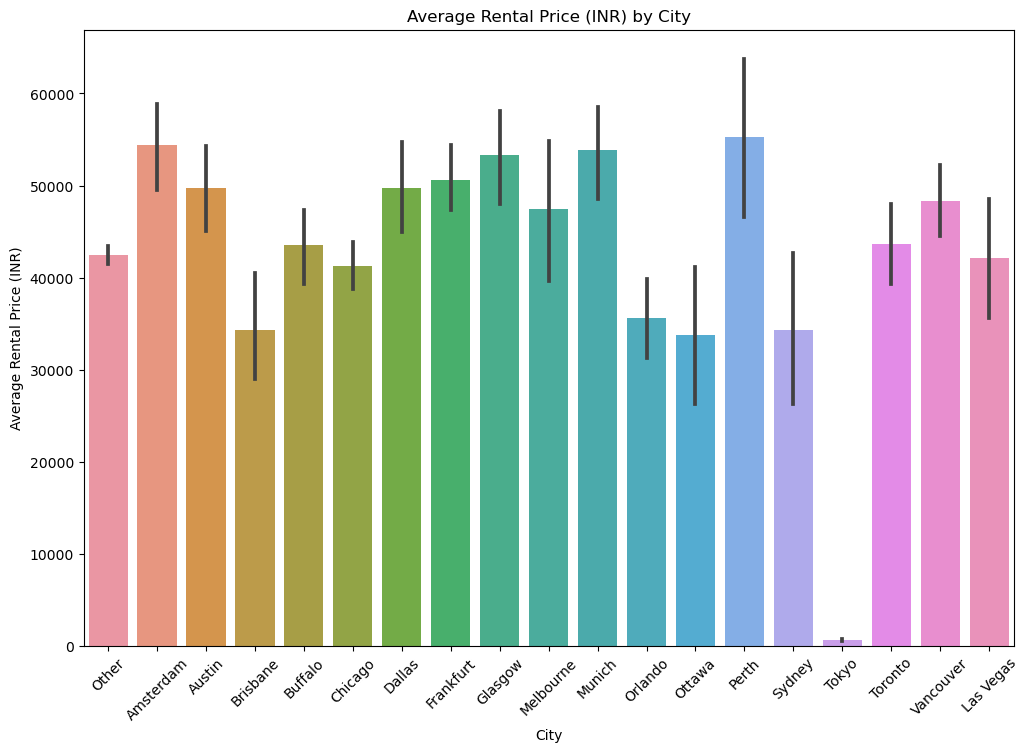

In [15]:
plt.figure(figsize=(12, 8))
sns.barplot(data=rental_data, x='cities', y='Rental Price (INR)')
plt.title('Average Rental Price (INR) by City')
plt.xlabel('City')
plt.ylabel('Average Rental Price (INR)')
plt.xticks(rotation=45)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [17]:
# data processing

rental_data.dropna(subset=['Rental Price (INR)', 'Area'], inplace=True)

# Splitting features and labels
X_rental = rental_data[['No of Bed', 'No of Bathrooms', 'No of Beds']]
y_rental_price = rental_data['Rental Price (INR)']
y_area = rental_data['Area']

# Splitting the data into train and test sets

X_rental_train, X_rental_test, y_rental_price_train, y_rental_price_test = train_test_split(X_rental, y_rental_price, test_size=0.20, random_state=42)
X_area_train, X_area_test, y_area_train, y_area_test = train_test_split(X_rental, y_area, test_size=0.20, random_state=42)


In [18]:
# Counting the number of samples in the training and testing sets for rental price prediction
print("Number of samples in rental price training set:", X_rental_train.shape[0])
print("Number of samples in rental price testing set:", X_rental_test.shape[0])

# Counting the number of samples in the training and testing sets for area prediction
print("Number of samples in area training set:", X_area_train.shape[0])
print("Number of samples in area testing set:", X_area_test.shape[0])


Number of samples in rental price training set: 4032
Number of samples in rental price testing set: 1009
Number of samples in area training set: 4032
Number of samples in area testing set: 1009


In [19]:
# Data standardization

scaler = StandardScaler()
X_rental_train_scaled = scaler.fit_transform(X_rental_train)
X_rental_test_scaled = scaler.transform(X_rental_test)


In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Convert rental price to categories (e.g., low, medium, high)
rental_data['Price Category'] = pd.qcut(rental_data['Rental Price (INR)'], q=3, labels=['Low', 'Medium', 'High'])

# Encode categorical labels
label_encoder = LabelEncoder()
rental_data['Price Category'] = label_encoder.fit_transform(rental_data['Price Category'])

# Split features and labels
X = rental_data[['No of Bed', 'No of Bathrooms', 'No of Beds']]
y = rental_data['Price Category']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100

print(f"Accuracy: {accuracy_percentage:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 41.82%
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.26      0.36       321
           1       0.41      0.45      0.43       340
           2       0.37      0.53      0.44       348

    accuracy                           0.42      1009
   macro avg       0.46      0.41      0.41      1009
weighted avg       0.46      0.42      0.41      1009



In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train Logistic Regression Classifier
logistic_classifier = LogisticRegression(random_state=42)
logistic_classifier.fit(X_train, y_train)

# Initialize and train Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

# Predict on test set for Logistic Regression
y_pred_logistic = logistic_classifier.predict(X_test)

# Predict on test set for Gradient Boosting Classifier
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate Logistic Regression Classifier
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Classifier:")
print(f"Accuracy: {accuracy_logistic*100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic))

# Evaluate Gradient Boosting Classifier
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("\nGradient Boosting Classifier:")
print(f"Accuracy: {accuracy_gb*100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))


Logistic Regression Classifier:
Accuracy: 37.26%
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.66      0.47       321
           1       0.38      0.48      0.42       340
           2       0.00      0.00      0.00       348

    accuracy                           0.37      1009
   macro avg       0.25      0.38      0.30      1009
weighted avg       0.24      0.37      0.29      1009


Gradient Boosting Classifier:
Accuracy: 42.02%
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.22      0.33       321
           1       0.40      0.40      0.40       340
           2       0.39      0.62      0.47       348

    accuracy                           0.42      1009
   macro avg       0.48      0.42      0.40      1009
weighted avg       0.48      0.42      0.41      1009



In [27]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Gradient Boosting Classifier
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize GridSearchCV for Gradient Boosting Classifier
grid_search_gb = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                              param_grid=param_grid_gb,
                              scoring='accuracy',
                              cv=5,
                              n_jobs=-1)

# Fit the grid search to the data
grid_search_gb.fit(X_train, y_train)

# Get the best parameters and best model
best_params_gb = grid_search_gb.best_params_
best_model_gb = grid_search_gb.best_estimator_

# Predict on test set using the best model
y_pred_gb_best = best_model_gb.predict(X_test)

# Evaluate the best model
accuracy_gb_best = accuracy_score(y_test, y_pred_gb_best)
print("Gradient Boosting Classifier (Best Model):")
print(f"Best Parameters: {best_params_gb}")
print(f"Accuracy: {accuracy_gb_best*100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_gb_best))


Gradient Boosting Classifier (Best Model):
Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}
Accuracy: 42.42%
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.25      0.35       321
           1       0.42      0.39      0.40       340
           2       0.39      0.62      0.47       348

    accuracy                           0.42      1009
   macro avg       0.47      0.42      0.41      1009
weighted avg       0.47      0.42      0.41      1009



In [28]:
from sklearn.model_selection import cross_val_score


# Initialize the best Gradient Boosting Classifier with the best parameters
best_gb_classifier = GradientBoostingClassifier(learning_rate=0.1, max_depth=4, n_estimators=50, random_state=42)

# Perform cross-validation
cv_scores_gb = cross_val_score(best_gb_classifier, X, y, cv=5, scoring='accuracy')

# Print the mean and standard deviation of cross-validation scores for Gradient Boosting Classifier
print("Gradient Boosting Classifier (Best Model) - Cross Validation Results:")
print(f"Mean Accuracy: {np.mean(cv_scores_gb)*100:.2f}%")
print(f"Standard Deviation: {np.std(cv_scores_gb)*100:.2f}%")


Gradient Boosting Classifier (Best Model) - Cross Validation Results:
Mean Accuracy: 36.70%
Standard Deviation: 3.68%


In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report

# Initialize the best Gradient Boosting Classifier with the best parameters
best_gb_classifier = GradientBoostingClassifier(learning_rate=0.1, max_depth=4, n_estimators=50, random_state=42)

# Fit the model
best_gb_classifier.fit(X, y)

# Predict on the entire dataset
y_pred = best_gb_classifier.predict(X)

# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})

# Print the first few rows of the comparison DataFrame
print(comparison_df.head())

# Perform cross-validation predictions
y_cv_pred = cross_val_predict(best_gb_classifier, X, y, cv=5)

# Evaluate the model using cross-validated predictions
print("Classification Report:")
print(classification_report(y, y_cv_pred))


   Actual  Predicted
0       2          2
1       0          0
2       2          2
3       0          0
4       2          2
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.37      0.38      1680
           1       0.35      0.40      0.37      1692
           2       0.36      0.34      0.35      1669

    accuracy                           0.37      5041
   macro avg       0.37      0.37      0.37      5041
weighted avg       0.37      0.37      0.37      5041



In [30]:
import pickle

# Save the trained model to a file
with open('gradient_boosting_classifier.pkl', 'wb') as f:
    pickle.dump(best_gb_classifier, f)
